In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## NumPy Examples

### Array Creation

In [2]:
# array creation by sequence
A = np.array([[1,2,3],[4,5,6]])
print("This is array A",A)

This is array A [[1 2 3]
 [4 5 6]]


In [3]:
# pre-format arrays with zeros/ones
A = np.zeros((2,3))
B = np.ones(5) 
C = np.zeros(shape=(100,100), dtype=float)
D = np.ones((2,2),dtype=np.int16)
E = np.empty((2,2))
print("This is array A",A,"and array B",B)
print("This is array C",C)
print("This is array D",D)
print("This is array E",E)

This is array A [[0. 0. 0.]
 [0. 0. 0.]] and array B [1. 1. 1. 1. 1.]
This is array C [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
This is array D [[1 1]
 [1 1]]
This is array E [[4.9e-324 1.5e-323]
 [1.5e-323 4.9e-324]]


In [4]:
# creation through ranges 
A = np.arange(2,10,2) # array from 2 to 10 with steps of 2
B = np.linspace(0,4.5,10) # array from 0 to 4.5 at steps of 0.5
print("This is array A",A,"and B",B)

This is array A [2 4 6 8] and B [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


In [5]:
# from random source 
A = np.random.rand(1,2)
B = 2 * np.random.randn(1,2) + 10 # mu = 10, sigma = 2 
print(A,B)

[[0.79401517 0.47430998]] [[ 6.91773465 12.94917123]]


In [6]:
# arrays have attributes that can be printed to have informations that are needed
print(A.ndim, A.shape, A.size, A.dtype, A.itemsize, A.data)

2 (1, 2) 2 float64 8 <memory at 0x7fc32f5e7520>


### Manipulation of arrays

In [7]:
# reshape array
A = np.arange(12).reshape(4,3) # reshape an array of 12 elements arranged in 3 columns and 4 rows
print(A)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [8]:
# A is an array of 10 elements, by doing A[2,5] a sub-array is given with only elements between 2 and 5
A = np.arange(10)
A[2:5]  

array([2, 3, 4])

In [9]:
# A is an array of 9 elements, ordered in 3 columns and 3 rowe. 
A = np.arange(9).reshape(3,3)
A, A[1], A[:,1] # A gives the whole 3x3 matrix, A[1] gives only the row 1 of the matrix, A[:,1] gives only column 1 of the matrix

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([3, 4, 5]),
 array([1, 4, 7]))

In [10]:
# for loop over A. Each element of the matrix A is squared
for i in A: 
    print (i**2)

[0 1 4]
[ 9 16 25]
[36 49 64]


In [11]:
# Alternative way to loop over A and square each element of the matrix
[i**2 for i in A]

[array([0, 1, 4]), array([ 9, 16, 25]), array([36, 49, 64])]

In [12]:
# Flat: Return a copy of the array collapsed into one dimension.
[i**2 for i in A.flat]

[0, 1, 4, 9, 16, 25, 36, 49, 64]

In [13]:
# reshaping
A = np.floor(10*np.random.random((3,4)))
print(A, A.shape)
print(A.ravel()) # flatten array
print(A.reshape(6,2)) 
print(A.T, A.T.shape)

[[0. 4. 1. 9.]
 [0. 7. 2. 0.]
 [7. 6. 1. 5.]] (3, 4)
[0. 4. 1. 9. 0. 7. 2. 0. 7. 6. 1. 5.]
[[0. 4.]
 [1. 9.]
 [0. 7.]
 [2. 0.]
 [7. 6.]
 [1. 5.]]
[[0. 0. 7.]
 [4. 7. 6.]
 [1. 2. 1.]
 [9. 0. 5.]] (4, 3)


In [14]:
# use resize to reshape in place
B = A 
A.resize(2,6)
print(A)
B.reshape(3,-1) # -1 calc cols automatically
print(B)

[[0. 4. 1. 9. 0. 7.]
 [2. 0. 7. 6. 1. 5.]]
[[0. 4. 1. 9. 0. 7.]
 [2. 0. 7. 6. 1. 5.]]


In [15]:
# stacking
A = np.floor(10*np.random.random((3,4)))
B = np.floor(10*np.random.random((3,4)))
print(A)
print(B)
C = np.vstack((A,B))
print(C)
D = np.hstack((A,B))
print(D)

[[5. 1. 3. 8.]
 [4. 8. 5. 5.]
 [9. 8. 8. 3.]]
[[7. 4. 1. 4.]
 [8. 2. 5. 3.]
 [5. 2. 0. 4.]]
[[5. 1. 3. 8.]
 [4. 8. 5. 5.]
 [9. 8. 8. 3.]
 [7. 4. 1. 4.]
 [8. 2. 5. 3.]
 [5. 2. 0. 4.]]
[[5. 1. 3. 8. 7. 4. 1. 4.]
 [4. 8. 5. 5. 8. 2. 5. 3.]
 [9. 8. 8. 3. 5. 2. 0. 4.]]


In [16]:
# splitting
A = np.floor(10*np.random.random((2,12)))
print("A", A)
B, C, D = np.hsplit(A,3)
print("B", B)
print("C", C)
print("D", D)
E, F, G = np.hsplit(A,(3,4)) # split A after col 3 and col 4
print("E", E)
print("F", F)
print("G", G)

A [[2. 1. 5. 2. 1. 0. 7. 8. 9. 5. 4. 2.]
 [1. 3. 8. 8. 2. 9. 5. 6. 0. 4. 6. 0.]]
B [[2. 1. 5. 2.]
 [1. 3. 8. 8.]]
C [[1. 0. 7. 8.]
 [2. 9. 5. 6.]]
D [[9. 5. 4. 2.]
 [0. 4. 6. 0.]]
E [[2. 1. 5.]
 [1. 3. 8.]]
F [[2.]
 [8.]]
G [[1. 0. 7. 8. 9. 5. 4. 2.]
 [2. 9. 5. 6. 0. 4. 6. 0.]]


### Logic check

In [17]:
# logic check: Check if the elements of the matrix A (above) are greater of 2 or not and return False or True.
A > 2

array([[False, False,  True, False, False, False,  True,  True,  True,
         True,  True, False],
       [False,  True,  True,  True, False,  True,  True,  True, False,
         True,  True, False]])

### Sort

In [18]:
# sort
a = np.floor(10*np.random.random((2,6)))
print(a)
# sort - row wise
b = np.sort(a)
print(b)

[[1. 9. 2. 7. 9. 1.]
 [4. 1. 0. 1. 5. 3.]]
[[1. 1. 2. 7. 9. 9.]
 [0. 1. 1. 3. 4. 5.]]


In [19]:
# sort - col wise
c = np.sort(a, axis=0)
print(c)

[[1. 1. 0. 1. 5. 1.]
 [4. 9. 2. 7. 9. 3.]]


In [20]:
# sort flatten
d = np.sort(a, axis=None)
print(d)

[0. 1. 1. 1. 1. 2. 3. 4. 5. 7. 9. 9.]


### Operations

In [21]:
# element wise add 
B = A
C = A + B
print(C)

[[ 4.  2. 10.  4.  2.  0. 14. 16. 18. 10.  8.  4.]
 [ 2.  6. 16. 16.  4. 18. 10. 12.  0.  8. 12.  0.]]


In [22]:
# element wise mult
C = A * 4
print(C)

[[ 8.  4. 20.  8.  4.  0. 28. 32. 36. 20. 16.  8.]
 [ 4. 12. 32. 32.  8. 36. 20. 24.  0. 16. 24.  0.]]


In [23]:
# element wise f()
def f(x):
    return 3*x**2 - 2*x + 7
f(A)

array([[ 15.,   8.,  72.,  15.,   8.,   7., 140., 183., 232.,  72.,  47.,
         15.],
       [  8.,  28., 183., 183.,  15., 232.,  72., 103.,   7.,  47., 103.,
          7.]])

In [24]:
# function apply on linspace
x = np.linspace(0, 2*3.14, 10)
f = np.sin(x)
f

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012,
       -0.34035671, -0.86496168, -0.98523494, -0.644954  , -0.0031853 ])

In [25]:
# inplace 
A *= 2
print(A)

[[ 4.  2. 10.  4.  2.  0. 14. 16. 18. 10.  8.  4.]
 [ 2.  6. 16. 16.  4. 18. 10. 12.  0.  8. 12.  0.]]


In [26]:
# sums along axis
print(A)
print(A.sum(axis=0)) # sum col
print(A.sum(axis=1)) # sum row
print(A.cumsum(axis=1)) # cumulative sum row

[[ 4.  2. 10.  4.  2.  0. 14. 16. 18. 10.  8.  4.]
 [ 2.  6. 16. 16.  4. 18. 10. 12.  0.  8. 12.  0.]]
[ 6.  8. 26. 20.  6. 18. 24. 28. 18. 18. 20.  4.]
[ 92. 104.]
[[  4.   6.  16.  20.  22.  22.  36.  52.  70.  80.  88.  92.]
 [  2.   8.  24.  40.  44.  62.  72.  84.  84.  92. 104. 104.]]


In [27]:
# broadcast row vector on all rows
A = np.ones((5,5))
B = A + [1, 2, 3, 4, 5]
B

array([[2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.]])

In [28]:
# universial functions 
print(np.exp(A))
print(np.sqrt(A))

[[2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


### Basic Statistics

In [29]:
# stats properties
A = np.arange(9).reshape(3,3)
print(A.sum(), A.min(), A.max())

36 0 8


In [30]:
# time example
time = np.linspace(20, 145, 5)
data = np.sin(np.arange(20)).reshape(5,4) 
print(time)
print(data)

[ 20.    51.25  82.5  113.75 145.  ]
[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]


In [31]:
ind = data.argmax(axis=0) # get max index for each series (col)
time_max = time[ind] # times corresponding to maxima
print(ind)
print(time_max)

[2 0 3 1]
[ 82.5   20.   113.75  51.25]


### Basic Linear Algebra

In [32]:
# matrix product
A = B
A @ B

array([[ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.]])

In [33]:
# matrix product alt 
A.dot(B)

array([[ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.]])

In [34]:
# matrix
m = np.matrix([[1,-2,3],[0,4,5],[7,8,-9]])
v = np.matrix([[2],[3],[4]])

In [35]:
# transpose
m.T

matrix([[ 1,  0,  7],
        [-2,  4,  8],
        [ 3,  5, -9]])

In [36]:
# inverse
m.I

matrix([[ 0.33043478, -0.02608696,  0.09565217],
        [-0.15217391,  0.13043478,  0.02173913],
        [ 0.12173913,  0.09565217, -0.0173913 ]])

In [37]:
# multiply 
m * v

matrix([[ 8],
        [32],
        [ 2]])

In [38]:
# determinant 
np.linalg.det(m)

-229.99999999999983

In [39]:
# eigenvalues
np.linalg.eigvals(m)

array([-13.11474312,   2.75956154,   6.35518158])

In [40]:
# Solve for x in mx = v
np.linalg.solve(m, v)

matrix([[0.96521739],
        [0.17391304],
        [0.46086957]])

## Pandas Examples

### Create

In [41]:
# DF from dictionary 
ex1 = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df1 = pd.DataFrame(ex1)
df1

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [42]:
ex2 = {'one' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
     'two' : pd.Series([1., 2., 3.], index=['a', 'b', 'c'])}
df2 = pd.DataFrame(ex2)
df2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,4.0,NaN


In [43]:
# define DF from random numbers 
dfr1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
dfr2 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
dfr1.astype('int32').dtypes

A    int32
B    int32
C    int32
D    int32
dtype: object

In [44]:
# multi-index frame (dict of tuples)
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
    ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
    ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
    ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
    ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### Combining

In [45]:
# simple addition
# define variables and target 
variables = ['A','B']
target   = ['D']


# combine variables and target to create a smaller dataset of dfr1 (without C column)
dfsum = dfr1[variables+target]



# Shuffle dataset
dfsum = dfsum.sample(frac=1).reset_index(drop=True)

# Get first 2 observations of dfsum columns == 0
df_frame = [dfsum[dfsum.A == 0].head(2),
            dfsum[dfsum.B == 0].head(2)]
# concat the df_frame in a new dataset df_sample
df_sample = pd.concat(df_frame)
df_sample

,A,B,D


In [46]:
# addition with 2 different DFs
dfSum2 = df1 + df2
dfSum2

,one,two
a,2.0,2.0
b,4.0,4.0
c,6.0,6.0
d,NaN,NaN


In [47]:
# operations automatically align the data based on label
df1[1:] + df1[:-1]

,one,two
a,NaN,NaN
b,4.0,4.0
c,6.0,6.0
d,NaN,NaN


In [48]:
# create new column from existing columns
df3 = df1
df3['three'] = df3['one'] * df3['two']
df3

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [49]:
# append boolean column based on conditional 
df3['flag'] = df3['one'] > 2
df3

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [50]:
# append scalar
df3['five'] = 6.
df3

,one,two,three,flag,five
a,1.0,1.0,1.0,False,6.0
b,2.0,2.0,4.0,False,6.0
c,3.0,3.0,9.0,True,6.0
d,NaN,4.0,NaN,False,6.0


In [51]:
# append random series 
df3['random'] = pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd'])
df3

,one,two,three,flag,five,random
a,1.0,1.0,1.0,False,6.0,-0.859529
b,2.0,2.0,4.0,False,6.0,-0.548950
c,3.0,3.0,9.0,True,6.0,0.627142
d,NaN,4.0,NaN,False,6.0,1.501165


In [52]:
# append using assign from precomputing values (not persistent)
df3.assign(ratio = (df3.one / df3.random))

,one,two,three,flag,five,random,ratio
a,1.0,1.0,1.0,False,6.0,-0.859529,-1.163428
b,2.0,2.0,4.0,False,6.0,-0.548950,-3.643316
c,3.0,3.0,9.0,True,6.0,0.627142,4.783608
d,NaN,4.0,NaN,False,6.0,1.501165,NaN


In [53]:
# assign with lambda (not persistent)
df3.assign(ratio_two = lambda x: (x.two / x.random))

,one,two,three,flag,five,random,ratio_two
a,1.0,1.0,1.0,False,6.0,-0.859529,-1.163428
b,2.0,2.0,4.0,False,6.0,-0.548950,-3.643316
c,3.0,3.0,9.0,True,6.0,0.627142,4.783608
d,NaN,4.0,NaN,False,6.0,1.501165,2.664597


In [54]:
# subtract all columns by first column - broadcasting column wise
df3.sub(df3['one'], axis=0)

,one,two,three,flag,five,random
a,0.0,0.0,0.0,-1.0,5.0,-1.859529
b,0.0,0.0,2.0,-2.0,4.0,-2.548950
c,0.0,0.0,6.0,-2.0,3.0,-2.372858
d,NaN,NaN,NaN,NaN,NaN,NaN


### Resizing and Reshaping

In [55]:
# pop column (can only run once in notebook)
flag = df3.pop('three')
flag

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [56]:
# transpose column names - get first 5 columns
dfr1[:5].T

,0,1,2,3,4
A,1.146257,0.994841,1.581774,-0.946090,-0.207008
B,-0.739836,-0.166655,-1.173724,0.573962,1.288159
C,2.115111,-0.407766,2.240727,-0.283818,0.178076
D,0.626183,-0.633057,-0.094676,1.956338,1.233891


In [57]:
# transform into numpy array 
np.asarray(dfr1)

array([[ 1.14625696, -0.73983636,  2.11511139,  0.62618309],
       [ 0.99484058, -0.166655  , -0.40776552, -0.63305714],
       [ 1.58177359, -1.17372411,  2.24072675, -0.09467624],
       [-0.94609022,  0.57396177, -0.28381765,  1.95633786],
       [-0.20700845,  1.28815895,  0.17807639,  1.23389111],
       [-0.14927659,  0.5192328 ,  1.09474073, -1.21456762],
       [-1.13009521,  0.05528813,  1.80197282,  1.75755819],
       [-2.27670295, -0.4368651 , -0.05700916, -0.53783407],
       [ 1.66491096, -0.04237627,  0.04206187,  0.20485713],
       [ 0.94073474,  0.76123126,  0.19822518,  2.29444504]])

### Filtering

In [58]:
# boolean compare elementwise
dfr1.gt(1)

,A,B,C,D
0,True,False,True,False
1,False,False,False,False
2,True,False,True,False
3,False,False,False,True
4,False,True,False,True
5,False,False,True,False
6,False,False,True,True
7,False,False,False,False
8,True,False,False,False
9,False,False,False,True


In [59]:
# boolean compare two DFs
dfr1.gt(dfr2)

,A,B,C,D
0,True,False,True,True
1,True,False,False,False
2,True,False,True,False
3,True,True,False,True
4,False,True,False,True
5,False,True,False,False
6,False,False,True,True
7,False,True,False,True
8,True,False,False,True
9,True,True,True,True


In [60]:
# boolean column reductions
(dfr1 > 1).all()

A    False
B    False
C    False
D    False
dtype: bool

In [61]:
(dfr1 > 1).any()

A    True
B    True
C    True
D    True
dtype: bool

In [62]:
# same does not work 
# TODO - what do (1) mean?
dfr1.sub(dfr1.mean(1), axis=0).div(dfr1.std(1), axis=0)

,A,B,C,D
0,0.301895,-1.282734,1.115892,-0.135053
1,1.447199,-0.156728,-0.489681,-0.800790
2,0.605568,-1.163468,1.028618,-0.470717
3,-1.014564,0.198624,-0.485990,1.301930
4,-1.102165,0.882593,-0.590984,0.810555
5,-0.213601,0.460564,1.040941,-1.287904
6,-1.230892,-0.397740,0.829924,0.798707
7,-1.466727,0.394848,0.779192,0.292686
8,1.487763,-0.633271,-0.528370,-0.326122
9,-0.121438,-0.323417,-0.956917,1.401772


In [63]:
# use apply to get mean on rows
dfr1.apply(np.mean, axis=1)

0    0.786929
1   -0.053159
2    0.638525
3    0.325098
4    0.623280
5    0.062532
6    0.621181
7   -0.827103
8    0.467363
9    1.048659
dtype: float64

In [64]:
# get diff min and max on columns
dfr1.apply(lambda x: x.max() - x.min())

A    3.941614
B    2.461883
C    2.648492
D    3.509013
dtype: float64

In [65]:
# get row with max value on columns
dfr1.apply(lambda x: x.idxmax())

A    8
B    4
C    2
D    9
dtype: int64

In [66]:
# apply custom function
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide
dfr1.apply(subtract_and_divide, args=(5,), divide=3)

,A,B,C,D
0,-1.284581,-1.913279,-0.961630,-1.457939
1,-1.335053,-1.722218,-1.802589,-1.877686
2,-1.139409,-2.057908,-0.919758,-1.698225
3,-1.982030,-1.475346,-1.761273,-1.014554
4,-1.735669,-1.237280,-1.607308,-1.255370
5,-1.716426,-1.493589,-1.301753,-2.071523
6,-2.043365,-1.648237,-1.066009,-1.080814
7,-2.425568,-1.812288,-1.685670,-1.845945
8,-1.111696,-1.680792,-1.652646,-1.598381
9,-1.353088,-1.412923,-1.600592,-0.901852


In [67]:
dfr1.agg(np.sum)

A    1.619343
B    0.638416
C    6.922323
D    5.593137
dtype: float64

In [68]:
# aggegrate - general form of sum(), here map functions to columns
def mymean(x):
    return x.mean()
dfr1.agg({'A': 'sum', 'B': mymean})

A    1.619343
B    0.063842
dtype: float64

In [69]:
# Transform - convert to absolute
dfr1.transform(np.abs)

,A,B,C,D
0,1.146257,0.739836,2.115111,0.626183
1,0.994841,0.166655,0.407766,0.633057
2,1.581774,1.173724,2.240727,0.094676
3,0.946090,0.573962,0.283818,1.956338
4,0.207008,1.288159,0.178076,1.233891
5,0.149277,0.519233,1.094741,1.214568
6,1.130095,0.055288,1.801973,1.757558
7,2.276703,0.436865,0.057009,0.537834
8,1.664911,0.042376,0.042062,0.204857
9,0.940735,0.761231,0.198225,2.294445


In [70]:
# and for series
dfr1.A.transform(np.abs)

0    1.146257
1    0.994841
2    1.581774
3    0.946090
4    0.207008
5    0.149277
6    1.130095
7    2.276703
8    1.664911
9    0.940735
Name: A, dtype: float64

In [71]:
# map()
f = lambda x: x+100
dfr1.A.map(f)
dfr1.applymap(f)

,A,B,C,D
0,101.146257,99.260164,102.115111,100.626183
1,100.994841,99.833345,99.592234,99.366943
2,101.581774,98.826276,102.240727,99.905324
3,99.053910,100.573962,99.716182,101.956338
4,99.792992,101.288159,100.178076,101.233891
5,99.850723,100.519233,101.094741,98.785432
6,98.869905,100.055288,101.801973,101.757558
7,97.723297,99.563135,99.942991,99.462166
8,101.664911,99.957624,100.042062,100.204857
9,100.940735,100.761231,100.198225,102.294445


## Matplotlib Examples

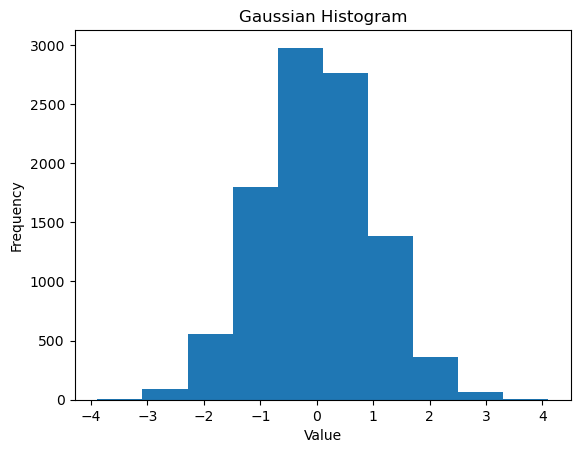

In [72]:
# normal distribution histogram
gaussian_numbers = np.random.randn(10000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

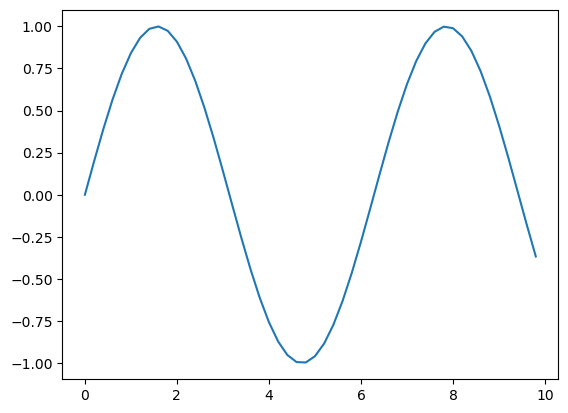

In [73]:
# line plot 
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

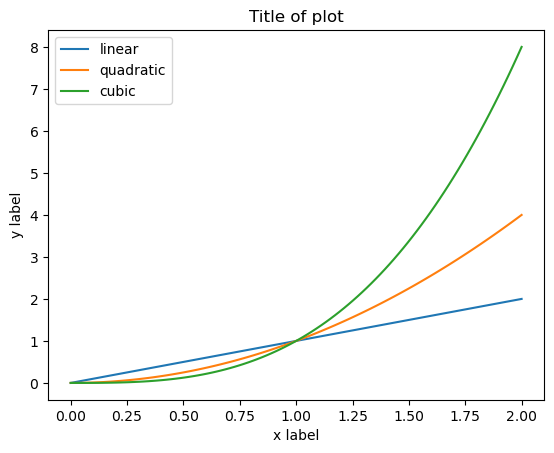

In [74]:
# Multiple plots
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Title of plot")

plt.legend()
plt.show()

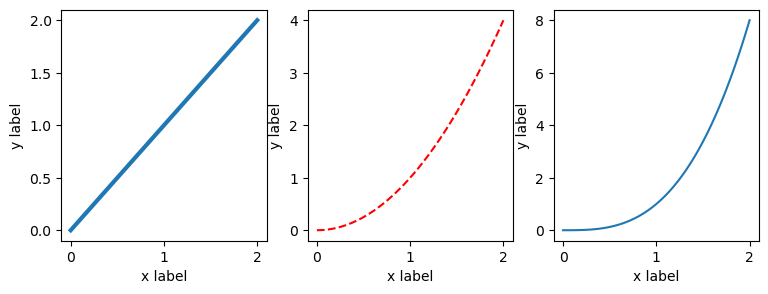

In [75]:
x = np.linspace(0, 2, 100)

plt.figure(1, figsize=(9, 3)) 

plt.subplot(131)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x, label='linear', linewidth=3)

plt.subplot(132)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x**2, 'r--', label='quadratic')

plt.subplot(133)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x**3, label='cubic')

plt.show()

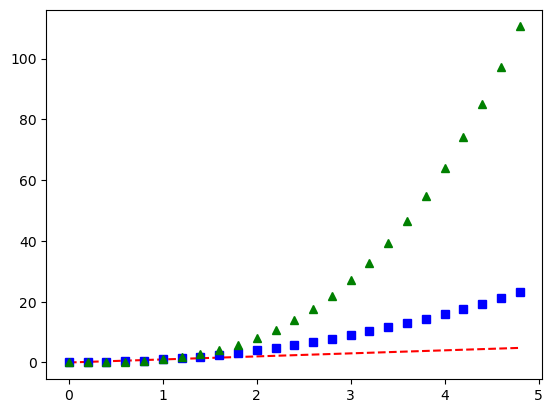

In [76]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()